# Analysis of the dataset
- dataset taken from https://www.kaggle.com/datasets/harshitshankhdhar/imdb-dataset-of-top-1000-movies-and-tv-shows

In [1]:
import pandas as pd
from sklearn.neighbors import NearestNeighbors
import warnings
from recommender import Recommender
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('./../data/data.csv')
df_original = df.copy()
df.head(1)

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"


In [3]:
# check dtypes
df.dtypes

Poster_Link       object
Series_Title      object
Released_Year     object
Certificate       object
Runtime           object
Genre             object
IMDB_Rating      float64
Overview          object
Meta_score       float64
Director          object
Star1             object
Star2             object
Star3             object
Star4             object
No_of_Votes        int64
Gross             object
dtype: object

In [4]:
# drop columns Poster_Link, Series_Title, Overview
df.drop(['Poster_Link', 'Series_Title', 'Overview'], axis=1, inplace=True)

In [5]:
# print all unique values in a Release_Year column
df['Released_Year'].unique()

array(['1994', '1972', '2008', '1974', '1957', '2003', '1993', '2010',
       '1999', '2001', '1966', '2002', '1990', '1980', '1975', '2020',
       '2019', '2014', '1998', '1997', '1995', '1991', '1977', '1962',
       '1954', '1946', '2011', '2006', '2000', '1988', '1985', '1968',
       '1960', '1942', '1936', '1931', '2018', '2017', '2016', '2012',
       '2009', '2007', '1984', '1981', '1979', '1971', '1963', '1964',
       '1950', '1940', '2013', '2005', '2004', '1992', '1987', '1986',
       '1983', '1976', '1973', '1965', '1959', '1958', '1952', '1948',
       '1944', '1941', '1927', '1921', '2015', '1996', '1989', '1978',
       '1961', '1955', '1953', '1925', '1924', '1982', '1967', '1951',
       '1949', '1939', '1937', '1934', '1928', '1926', '1920', '1970',
       '1969', '1956', '1947', '1945', '1930', '1938', '1935', '1933',
       '1932', '1922', '1943', 'PG'], dtype=object)

In [6]:
# print row where Released_Year is PG
df[df['Released_Year'] == 'PG']

,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
966,PG,U,140 min,"Adventure, Drama, History",7.6,77.0,Ron Howard,Tom Hanks,Bill Paxton,Kevin Bacon,Gary Sinise,269197,"173,837,933"


In [7]:
# swap value PG with 1995
df.loc[df['Released_Year'] == 'PG', 'Released_Year'] = 1995

In [8]:
# convert Released_Year to int
df['Released_Year'] = df['Released_Year'].astype(int)

<AxesSubplot: >

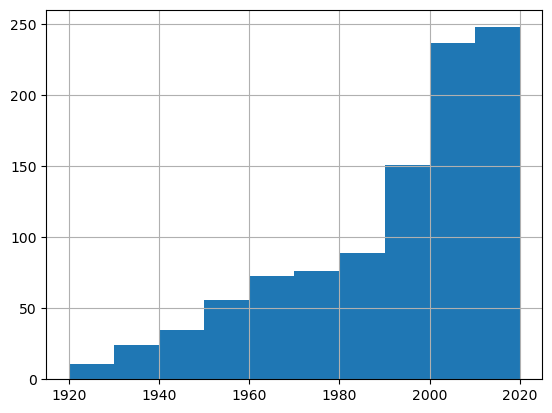

In [9]:
# plot histogram of Released_Year
df['Released_Year'].hist()

In [10]:
# print all unique values in a certificate column and their counts
df['Certificate'].value_counts()

U           234
A           197
UA          175
R           146
PG-13        43
PG           37
Passed       34
G            12
Approved     11
TV-PG         3
GP            2
TV-14         1
16            1
TV-MA         1
Unrated       1
U/A           1
Name: Certificate, dtype: int64

In [11]:
# all unique values with count less than 2 are replaced with 'Other'
df.loc[df['Certificate'].isin(df['Certificate'].value_counts()[df['Certificate'].value_counts() == 1].index), 'Certificate'] = 'Other'

In [12]:
# print all unique values in a certificate column and their counts
df['Certificate'].value_counts()

U           234
A           197
UA          175
R           146
PG-13        43
PG           37
Passed       34
G            12
Approved     11
Other         5
TV-PG         3
GP            2
Name: Certificate, dtype: int64

In [13]:
# make Certificate column categorical variable 
df['Certificate'] = df['Certificate'].astype('category')

In [14]:
# one hot encode Certificate column
df = pd.get_dummies(df, columns=['Certificate'])

In [15]:
df.shape

(1000, 24)

In [16]:
# top 10 genres
df['Genre'].value_counts().head(10)

Drama                           85
Drama, Romance                  37
Comedy, Drama                   35
Comedy, Drama, Romance          31
Action, Crime, Drama            30
Biography, Drama, History       28
Crime, Drama, Thriller          28
Crime, Drama, Mystery           27
Crime, Drama                    26
Animation, Adventure, Comedy    24
Name: Genre, dtype: int64

In [17]:
# convert Genre column to lowercase
df['Genre'] = df['Genre'].str.lower()

In [18]:
# looks that there are mixed genres get all genre keywords to list
genres = df['Genre'].str.split(',').values.tolist()
# flatten list
genres = [item for sublist in genres for item in sublist]
# remove whitespaces
genres = [item.strip() for item in genres]
# delete duplicates
genres = list(set(genres))
print(len(genres))
print(genres)

21
['comedy', 'crime', 'horror', 'drama', 'western', 'musical', 'action', 'history', 'biography', 'sci-fi', 'sport', 'thriller', 'romance', 'mystery', 'music', 'family', 'adventure', 'war', 'film-noir', 'fantasy', 'animation']


In [19]:
# create new columns for each genre and assign False to all rows
for genre in genres:
    df[genre] = False

# assign True to those rows where genre is present
for index, row in df.iterrows():
    for genre in row['Genre'].split(','):
        df.loc[index, genre.strip()] = True

# drop column Genre
df.drop(columns='Genre', inplace=True)

In [20]:
df.shape

(1000, 44)

In [21]:
# print most common Directors
df['Director'].value_counts().head(20)

Alfred Hitchcock     14
Steven Spielberg     13
Hayao Miyazaki       11
Martin Scorsese      10
Akira Kurosawa       10
Stanley Kubrick       9
Billy Wilder          9
Woody Allen           9
Christopher Nolan     8
Quentin Tarantino     8
David Fincher         8
Clint Eastwood        8
Rob Reiner            7
Howard Hawks          7
Ingmar Bergman        7
Ridley Scott          6
Alfonso Cuarón        6
Charles Chaplin       6
Richard Linklater     6
Sergio Leone          6
Name: Director, dtype: int64

In [22]:
# count number of directors, that have at least 5 movies in the dataset
common_directors = df['Director'].value_counts()[df['Director'].value_counts() >= 5].index
print(len(common_directors))

35


In [23]:
# create new columns for all directors with at least 5 movies
for director in common_directors:
    print(director)
    df[director] = False

# assign True to those rows where director is present
for index, row in df.iterrows():
    for director in row['Director'].split(','):
        director = director.strip()
        if director in common_directors:
            df.loc[index, director] = True

# drop column Director
df.drop(columns='Director', inplace=True)

Alfred Hitchcock
Steven Spielberg
Hayao Miyazaki
Martin Scorsese
Akira Kurosawa
Stanley Kubrick
Billy Wilder
Woody Allen
Christopher Nolan
Quentin Tarantino
David Fincher
Clint Eastwood
Rob Reiner
Howard Hawks
Ingmar Bergman
Ridley Scott
Alfonso Cuarón
Charles Chaplin
Richard Linklater
Sergio Leone
Joel Coen
Wes Anderson
David Lynch
Sidney Lumet
Denis Villeneuve
Peter Jackson
Robert Zemeckis
James Cameron
Francis Ford Coppola
Roman Polanski
Ron Howard
John Ford
Andrei Tarkovsky
John Huston
Federico Fellini


In [24]:
df.shape

(1000, 78)

In [25]:
# print most common Stars from columns Star1, Star2, Star3, Star4 use pandas concat
all_stars = pd.concat([df['Star1'], df['Star2'], df['Star3'], df['Star4']])
all_stars.value_counts().head(20)

Robert De Niro        17
Tom Hanks             14
Al Pacino             13
Clint Eastwood        12
Brad Pitt             12
Leonardo DiCaprio     11
Matt Damon            11
Christian Bale        11
James Stewart         10
Ethan Hawke            9
Scarlett Johansson     9
Michael Caine          9
Johnny Depp            9
Humphrey Bogart        9
Denzel Washington      9
Aamir Khan             8
Harrison Ford          8
Edward Norton          7
Ian McKellen           7
Robert Downey Jr.      7
dtype: int64

In [26]:
# count all stars that have at least 5 movies in the dataset
common_stars = all_stars.value_counts()[all_stars.value_counts() >= 7].index
print(len(common_stars))

30


In [27]:
# create new columns for all stars with at least 7 movies
for star in common_stars:
    # create new column and assign False to all rows
    df[star] = False

# assign True to those rows where star is present
for index, row in df.iterrows():
    for star in [row['Star1'], row['Star2'], row['Star3'], row['Star4']]:
        star = star.strip()
        if star in common_stars:
            df.loc[index, star] = True

# drop columns Star1, Star2, Star3, Star4
df.drop(columns=['Star1', 'Star2', 'Star3', 'Star4'], inplace=True)

In [28]:
# print 5 most common runtime values
df['Runtime'].value_counts().head(5)

100 min    23
130 min    23
129 min    22
101 min    22
113 min    22
Name: Runtime, dtype: int64

In [29]:
# delete mins from runtime values
df['Runtime'] = df['Runtime'].str.replace('min', '')

In [30]:
# convert runtime values to int
df['Runtime'] = df['Runtime'].astype(int)

<AxesSubplot: ylabel='Frequency'>

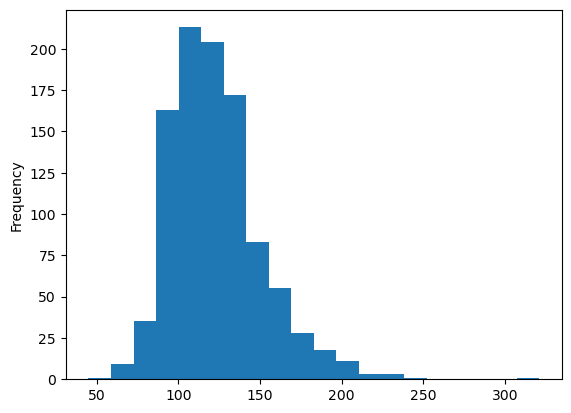

In [31]:
# plot histogram of runtime values
df['Runtime'].plot(kind='hist', bins=20)

In [32]:
# print all unique values in a Gross column and their counts
df['Gross'].value_counts()

4,360,000      5
25,000,000     2
5,450,000      2
5,321,508      2
9,600,000      2
              ..
106,662        1
10,950         1
4,018,695      1
141,319,928    1
30,500,000     1
Name: Gross, Length: 823, dtype: int64

In [33]:
# count NaN values in Gross column
df['Gross'].isna().sum()

169

In [34]:
# convert Gross values to int, replace ',' with ''
df['Gross'] = df['Gross'].str.replace(',', '')
# replace Nan values with 0
df['Gross'] = df['Gross'].fillna(0)
df['Gross'] = df['Gross'].astype(int)

<AxesSubplot: ylabel='Frequency'>

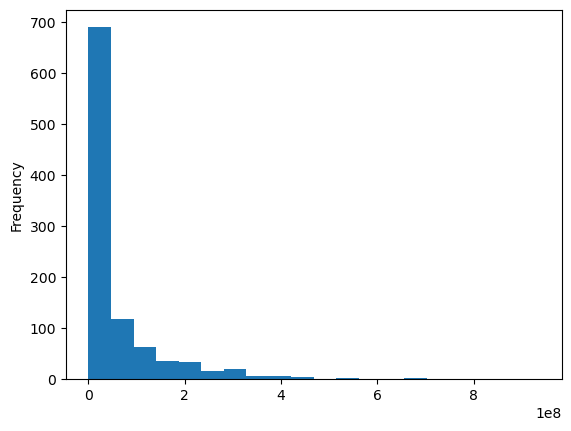

In [35]:
# plot histogram of Gross values
df['Gross'].plot(kind='hist', bins=20)

## features prep done
- check

In [36]:
# print columns with nan values and their counts, only columns with nan values are printed
na_columns = df.isna().sum()[df.isna().sum() > 0]
print(na_columns)
# aplply mean imputation to all columns with nan values
df[na_columns.index] = df[na_columns.index].fillna(df[na_columns.index].mean())

Meta_score    157
dtype: int64


In [37]:
# check if number of object columns is 0
assert df.select_dtypes(include=['object']).shape[1] == 0
# check for any NaN values
assert df.isna().sum().sum() == 0

In [38]:
# apply standardization to all columns with values greater than 1
for column in df.columns:
    if df[column].max() > 1:
        df[column] = (df[column] - df[column].mean()) / df[column].std()

In [39]:
df.head(1)

,Released_Year,Runtime,IMDB_Rating,Meta_score,No_of_Votes,Gross,Certificate_A,Certificate_Approved,Certificate_G,Certificate_GP,...,Emma Watson,Tom Cruise,Jake Gyllenhaal,Cary Grant,Mark Ruffalo,Russell Crowe,Bruce Willis,Toshirô Mifune,Morgan Freeman,Jeff Bridges
0,0.119344,0.680189,4.902879,0.17853,6.321288,-0.27311,1,0,0,0,...,False,False,False,False,False,False,False,False,True,False


In [40]:
df.describe()

,Released_Year,Runtime,IMDB_Rating,Meta_score,No_of_Votes,Gross,Certificate_A,Certificate_Approved,Certificate_G,Certificate_GP,Certificate_Other,Certificate_PG,Certificate_PG-13,Certificate_Passed,Certificate_R,Certificate_TV-PG,Certificate_U,Certificate_UA
count,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,-1.634248e-16,-1.705303e-16,3.012701e-15,-9.094947e-16,-5.684342e-17,-5.151435e-17,0.197000,0.011000,0.01200,0.002000,0.005000,0.037000,0.043000,0.03400,0.146000,0.003000,0.234000,0.175000
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.397931,0.104355,0.10894,0.044699,0.070569,0.188856,0.202959,0.18132,0.353283,0.054717,0.423584,0.380157
min,-3.058576e+00,-2.772546e+00,-1.267917e+00,-4.398105e+00,-7.593941e-01,-5.476354e-01,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,-6.536638e-01,-7.080242e-01,-9.049291e-01,-5.255676e-01,-6.664168e-01,-5.433181e-01,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,3.340681e-01,-1.385009e-01,-1.789531e-01,-1.250729e-15,-4.128151e-01,-4.439649e-01,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
75%,7.635168e-01,5.022128e-01,5.470229e-01,6.405942e-01,3.068928e-01,4.846088e-02,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
max,1.235910e+00,7.051731e+00,4.902879e+00,1.938774e+00,6.321288e+00,8.525192e+00,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Columns: 103 entries, Released_Year to Jeff Bridges
dtypes: bool(85), float64(6), uint8(12)
memory usage: 141.7 KB


## Visualization

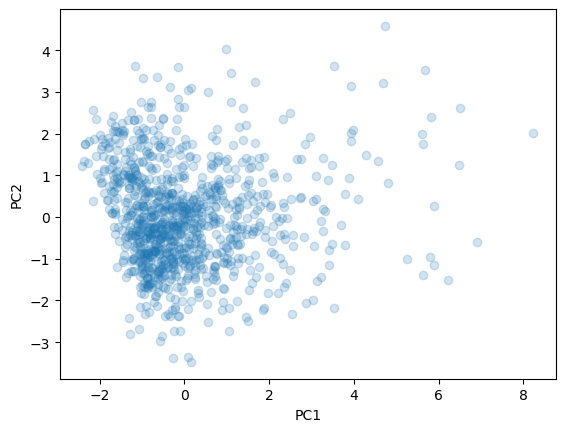

In [42]:
# visualize using PCA
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# create PCA instance
pca = PCA(n_components=2)

# fit PCA on the data
pca.fit(df)

# transform data
df_pca = pca.transform(df)

# create a scatter plot of the transformed data
plt.scatter(df_pca[:, 0], df_pca[:, 1], alpha=0.2)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [43]:
# # apply dimensionality reduction using PCA to reduce number of features
# pca = PCA(n_components=60)
# pca.fit(df)
# df_pca = pca.transform(df)
# # convert to dataframe
# df = pd.DataFrame(df_pca)

In [44]:
movies = ['The Godfather', 'The Lord of the Rings: The Fellowship of the Ring']
recommender = Recommender(df, df_original, metric='euclidean')
for movie in movies:
    recommender.add_movie(movie)
recommender.recommend()

,movie,distance
0,The Lord of the Rings: The Return of the King,1.099009
1,The Lord of the Rings: The Two Towers,1.638824
2,The Godfather: Part II,2.458201
3,Pulp Fiction,2.716605
4,Schindler's List,3.235023
5,Forrest Gump,3.425054
6,Interstellar,3.490620
7,The Dark Knight Rises,3.597778
8,Saving Private Ryan,3.642032
9,Inception,3.658369


In [45]:
movies = ['Finding Nemo', 'The Avengers']
recommender = Recommender(df, df_original, metric='euclidean')
for movie in movies:
    recommender.add_movie(movie)
recommender.recommend()

,movie,distance
0,Up,0.987513
1,Inside Out,1.230338
2,Toy Story 3,1.311447
3,"Monsters, Inc.",1.403269
4,Shrek,1.962566
5,Zootopia,2.065362
6,Ratatouille,2.081292
7,Avengers: Infinity War,2.492632
8,Rogue One,2.865826
9,Captain America: Civil War,2.920262


# results
- The Godfather - found part II, goodfellas, pulp fiction
- Finding Nemo - all titles are disney movies
- The Avengers - found marvel movies like Iron man, Captain America